### Basic example on how to use OMERO Python language bindings
See https://docs.openmicroscopy.org/latest/omero/developers/Python.html

### Import Packages required to connect to OMERO

In [1]:
from omero.gateway import BlitzGateway
from getpass import getpass
import ezomero
import matplotlib.pyplot as plt

In [2]:
HOST = '172.26.122.141'
image_id = 351 # blobs
# image_id = 352 # 3D nuclei
dataset_id = 201 # sample dataset

In [3]:
conn = ezomero.connect(host=HOST, user=input("Username: "),
               password=getpass("OMERO Password: "), port=4064)

In [4]:
omero_image, image = ezomero.get_image(conn, image_id, no_pixels=True) # shape follows TZYXC

In [5]:
image_shape = (omero_image.getSizeT(), omero_image.getSizeZ(), omero_image.getSizeY(), omero_image.getSizeX(), omero_image.getSizeC())
image_shape

(1, 1, 254, 256, 1)

In [6]:
omero_image, image = ezomero.get_image(conn, image_id,)
                                    #    start_coords=(5000, 5000, 0, 0, 0),
                                    #    axis_lengths=(10, 10, 1, 1, 1)) # assumes XYZCT ordering

In [7]:
parent_dataset_id = omero_image.getAncestry()[0].id
parent_dataset_id

201

In [8]:
image.shape

(1, 1, 254, 256, 1)

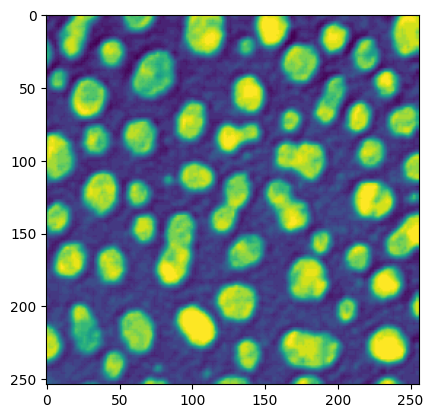

In [9]:
plt.imshow(image[0,0,:,:,0])

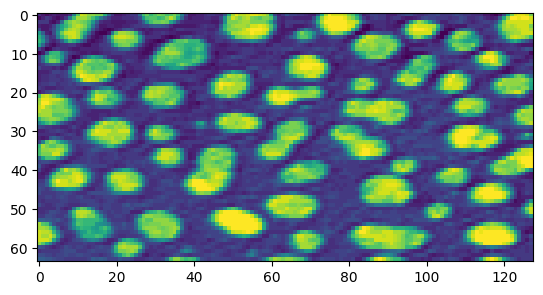

In [12]:
sub_image = image[0,0,0::4,0::2,0]
plt.imshow(sub_image)

In [14]:
import numpy as np
sub_image = np.expand_dims(sub_image, axis=(0, 1, -1))
sub_image.shape

(1, 1, 64, 128, 1)

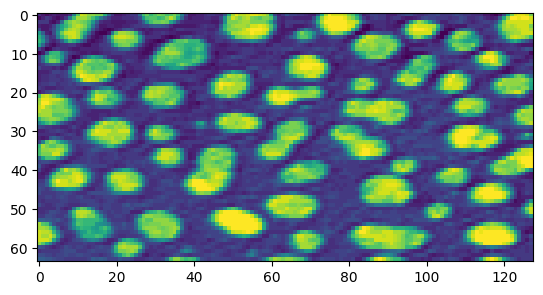

In [16]:
plt.imshow(sub_image[0,0,:,:,0])

In [19]:
ezomero.post_image(conn, sub_image, image_name='sub_image', dataset_id=parent_dataset_id, dim_order='tzyxc')

354

In [20]:
conn.close()